In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from keras.optimizers import Adam

In [16]:
# Loading the data

X_train = np.load("Xtrain1.npy")
X_train_extra = np.load("Xtrain1_extra.npy")
Y_train = np.load("Ytrain1.npy")
X_test = np.load("Xtest1.npy")

(2783, 2304)
(904, 2304)
[112 158 145 ...  84  96  99]
[[112 158 145 ... 122 130 137]
 [136 124 117 ... 108 111 121]
 [122 118 112 ... 141 156 139]
 ...
 [112 117 118 ... 139 122 112]
 [123 104 113 ... 108 108 113]
 [106 142 118 ...  84  96  99]]


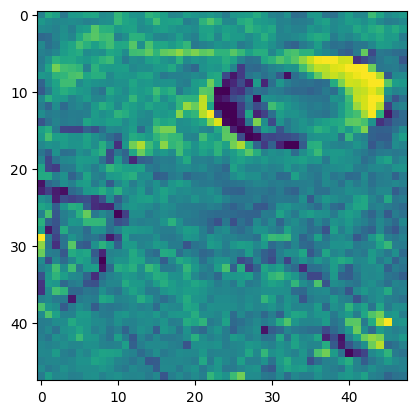

In [17]:
print(X_train.shape)
print(X_train_extra.shape)

resized = np.resize(X_train[1], [48,48])
#print(resized.shape)
print(X_train[1])
print(resized)
resized_trans = np.transpose(resized)
#plt.imshow(resized_trans)

plt.imshow(resized)


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_93 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,073 (1.35 MB)

 Trainable params: 355,073 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5593 - loss: 0.6945

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5308 - loss: 0.6892 - val_accuracy: 0.5879 - val_loss: 0.6586
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6824 - loss: 0.6494 - val_accuracy: 0.7018 - val_loss: 0.6380
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7492 - loss: 0.5543 - val_accuracy: 0.7215 - val_loss: 0.7125
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7471 - loss: 0.5306 - val_accuracy: 0.7356 - val_loss: 0.6621
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7655 - loss: 0.5106 - val_accuracy: 0.7707 - val_loss: 0.6041
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7907 - loss: 0.4807 - val_accuracy: 0.7384 - val_loss: 0.7358
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7786 - loss: 0.4910 - val_accuracy: 0.7356 - val_loss: 0.7425
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8024 - loss: 0.4414 - val_accuracy: 0.7440 - val_loss: 0.

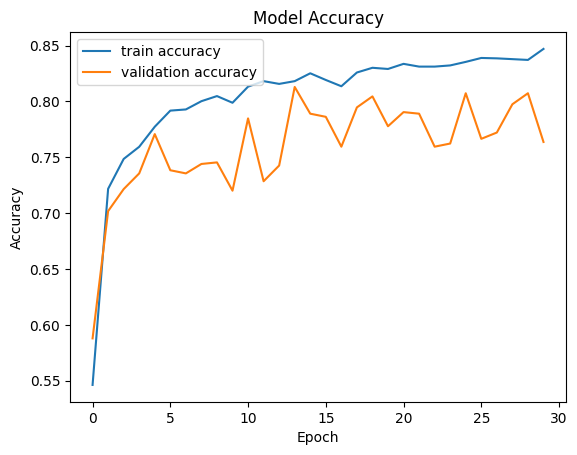

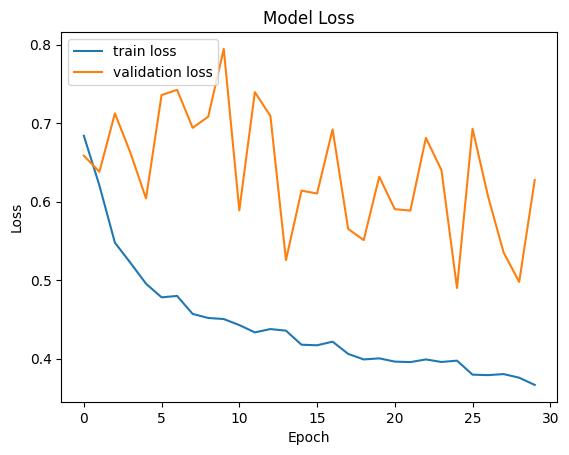

In [18]:
# Preprocessing: Normalize the images (values between 0 and 1)
X_train_norm = X_train / 255.0

# USING OVERSAMPLER - if needed, uncoment the following lines to use RandomOverSampler

# #Add an extra dimension to X to indicate grayscale channel (1 channel for grayscale)
# X_train_exp = np.expand_dims(X_train_norm, axis=-1)

# # Handle class imbalance using RandomOverSampler
# ros = RandomOverSampler(sampling_strategy='minority')
# X_resampled, y_resampled = ros.fit_resample(X_train_exp.reshape((X_train_exp.shape[0], -1)), Y_train)
# X_resampled = X_resampled.reshape((-1, 48, 48, 1))

# # Split data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# USING SMOTE - if needed, uncoment the following lines to use SMOTE

# Reshape the data to add channel dimension (grayscale images)
X_new = X_train_norm.reshape(X_train_norm.shape[0], 48, 48, 1)

# Flatten X for SMOTE (since SMOTE expects 2D data, we will reshape it back after)
X_flattened = X_new.reshape((X_new.shape[0], -1))

# Apply SMOTE to the dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_flattened, Y_train)

# Reshape X back to the original 4D shape (number of samples, 48, 48, 1)
X_resampled = X_resampled.reshape((X_resampled.shape[0], 48, 48, 1))

# Split into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Build CNN model
def create_model():
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening
    model.add(Flatten())

    # Fully connected layer with dropout
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    # Compile the model
    model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create and summarize the model
model = create_model()
model.summary()

# Train the model
batch_size = 32
epochs = 30

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model
val_preds = model.predict(X_val)
val_preds = np.round(val_preds)

# Classification report
print(classification_report(y_val, val_preds))

# F1 Score
f1 = f1_score(y_val, val_preds)
print("F1 Score: ", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, val_preds)
print("Confusion Matrix:\n", conf_matrix)

# Plotting training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


With CV

Training on Fold 1...
Epoch 1/20


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/88 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4076 - loss: 0.6971  

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4912 - loss: 0.6929 - val_accuracy: 0.6643 - val_loss: 0.6580
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5506 - loss: 0.6815 - val_accuracy: 0.7325 - val_loss: 0.5950
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6398 - loss: 0.6557 - val_accuracy: 0.7612 - val_loss: 0.5251
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7070 - loss: 0.6037 - val_accuracy: 0.7774 - val_loss: 0.5149
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7256 - loss: 0.5678 - val_accuracy: 0.7522 - val_loss: 0.5783
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7512 - loss: 0.5417 - val_accuracy: 0.8115 - val_loss: 0.4614
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7525 - loss: 0.5338 - val_accuracy: 0.8115 - val_loss: 0.4712
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7688 - loss: 0.5199 - val_accuracy: 0.7989 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4707 - loss: 0.6952

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5060 - loss: 0.6935 - val_accuracy: 0.6445 - val_loss: 0.6812
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5139 - loss: 0.6887 - val_accuracy: 0.6445 - val_loss: 0.6363
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6288 - loss: 0.6701 - val_accuracy: 0.6912 - val_loss: 0.5865
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6939 - loss: 0.6251 - val_accuracy: 0.7648 - val_loss: 0.5590
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7209 - loss: 0.5790 - val_accuracy: 0.7397 - val_loss: 0.7060
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7439 - loss: 0.5470 - val_accuracy: 0.7702 - val_loss: 0.6188
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7441 - loss: 0.5417 - val_accuracy: 0.7756 - val_loss: 0.6024
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7674 - loss: 0.5240 - val_accuracy: 0.7702 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
 7/90 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4932 - loss: 0.6948

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5015 - loss: 0.6939 - val_accuracy: 0.6302 - val_loss: 0.6764
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5385 - loss: 0.6894 - val_accuracy: 0.6427 - val_loss: 0.6607
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5874 - loss: 0.6798 - val_accuracy: 0.6607 - val_loss: 0.6072
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6759 - loss: 0.6310 - val_accuracy: 0.7307 - val_loss: 0.5747
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7325 - loss: 0.5865 - val_accuracy: 0.7235 - val_loss: 0.6033
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7277 - loss: 0.5652 - val_accuracy: 0.7433 - val_loss: 0.6105
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7368 - loss: 0.5386 - val_accuracy: 0.7522 - val_loss: 0.5821
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7359 - loss: 0.5532 - val_accuracy: 0.7576 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/90 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4543 - loss: 0.6952

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5277 - loss: 0.6916 - val_accuracy: 0.6133 - val_loss: 0.6532
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6252 - loss: 0.6679 - val_accuracy: 0.7482 - val_loss: 0.5911
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6765 - loss: 0.6171 - val_accuracy: 0.7266 - val_loss: 0.5918
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7100 - loss: 0.5746 - val_accuracy: 0.7284 - val_loss: 0.6079
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7284 - loss: 0.5595 - val_accuracy: 0.7374 - val_loss: 0.6090
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7316 - loss: 0.5518 - val_accuracy: 0.7716 - val_loss: 0.5674
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7429 - loss: 0.5320 - val_accuracy: 0.7356 - val_loss: 0.6372
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7542 - loss: 0.5352 - val_accuracy: 0.7806 - val_loss: 0.

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/89 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5129 - loss: 0.6930

/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5001 - loss: 0.6925 - val_accuracy: 0.6403 - val_loss: 0.6632
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5489 - loss: 0.6837 - val_accuracy: 0.7194 - val_loss: 0.6136
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6652 - loss: 0.6531 - val_accuracy: 0.7212 - val_loss: 0.5660
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7168 - loss: 0.5818 - val_accuracy: 0.7770 - val_loss: 0.5372
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7485 - loss: 0.5479 - val_accuracy: 0.7644 - val_loss: 0.5613
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7482 - loss: 0.5395 - val_accuracy: 0.7716 - val_loss: 0.5798
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7542 - loss: 0.5461 - val_accuracy: 0.7914 - val_loss: 0.5278
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7456 - loss: 0.5278 - val_accuracy: 0.7752 - val_loss: 0.

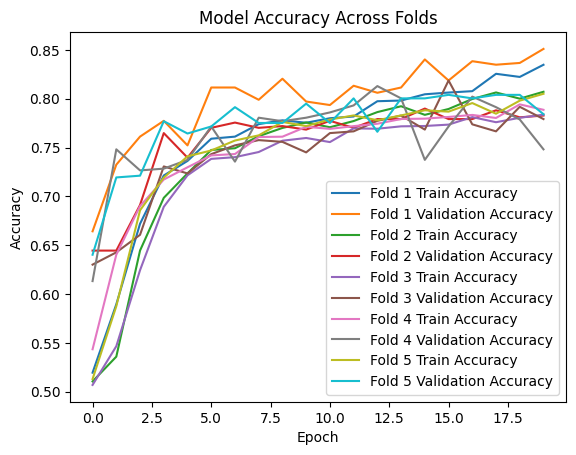

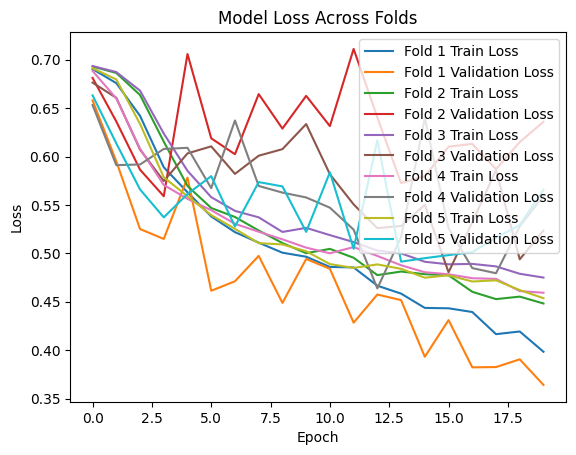

In [13]:
# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize lists to store metrics
f1_scores = []
histories = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, val_index in kf.split(X_train_norm):
    print(f"Training on Fold {fold}...")
    
    # Split the data into training and validation sets
    X_train, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train, y_val = Y_train[train_index], Y_train[val_index]
    
    # Flatten the training data for RandomOverSampling
    X_train_flattened = X_train.reshape((X_train.shape[0], -1))
    
    # Apply RandomOverSampling to balance the training data
    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flattened, y_train)
    
    # Reshape the resampled data back to image shape
    X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 48, 48, 1))
    
    # Shuffle the resampled training data
    X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)
    
    # Create a new CNN model for each fold
    model = create_model()

    # Train the model with data augmentation
    history = model.fit(
        datagen.flow(X_train_resampled, y_train_resampled, batch_size=32),
        validation_data=(X_val.reshape(X_val.shape[0], 48, 48, 1), y_val),  # Ensure X_val has shape (48, 48, 1)
        epochs=20
    )
    
    # Append the training history for later analysis
    histories.append(history.history)
    
    # Evaluate the model
    val_preds = model.predict(X_val.reshape(X_val.shape[0], 48, 48, 1))
    val_preds = np.round(val_preds)  # Convert probabilities to binary 0 or 1

    # Calculate and store the F1 score
    f1 = f1_score(y_val, val_preds)
    f1_scores.append(f1)

    print(f"F1 Score for Fold {fold}: {f1}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    print(f"Confusion Matrix for Fold {fold}:\n", conf_matrix)

    # Increment fold number
    fold += 1

# Print average F1 score
print(f"\nAverage F1 Score: {np.mean(f1_scores)}")

# Plot accuracy and loss curves
for i, history in enumerate(histories):
    plt.plot(history['accuracy'], label=f'Fold {i+1} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'Fold {i+1} Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history['loss'], label=f'Fold {i+1} Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {i+1} Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Using a CNN for feature extraction and training the model with a DNN

Training on Fold 1...
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4957 - loss: 0.6973 - val_accuracy: 0.6840 - val_loss: 0.6748
Epoch 2/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 0.6883 - val_accuracy: 0.7630 - val_loss: 0.6735
Epoch 3/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6155 - loss: 0.6759 - val_accuracy: 0.7271 - val_loss: 0.6388
Epoch 4/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6537 - loss: 0.6457 - val_accuracy: 0.7020 - val_loss: 0.6193
Epoch 5/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6804 - loss: 0.6274 - val_accuracy: 0.7828 - val_loss: 0.5708
Epoch 6/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6651 - loss: 0.6205 - val_accuracy: 0.7702 - val_loss: 0.5582
Epoch 7/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6799 - loss: 0.6158 - val_accuracy: 0.7594 - val_loss: 0.5476
Epoch 8/15
88/88 ━

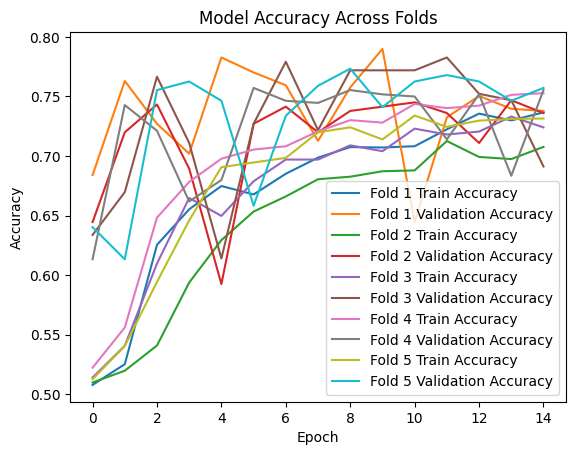

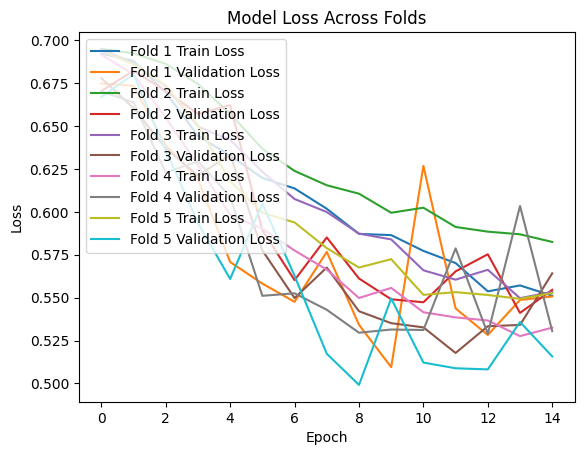

In [14]:
# Load the data (replace with actual loading code)
X = np.load('Xtrain1.npy')  
y = np.load('Ytrain1.npy')  

# Preprocessing: Normalize images (pixel values between 0 and 1)
X = X / 255.0

# Reshape the data to add channel dimension (grayscale images)
X = X.reshape(X.shape[0], 48, 48, 1)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Initialize lists to store metrics
f1_scores = []
histories = []

# Data augmentation using ImageDataGenerator for CNN training
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

# Build the CNN feature extractor model
def create_cnn_feature_extractor():
    inputs = Input(shape=(48, 48, 1))
    
    # Convolutional Layer 1
    x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Layer 2
    x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional Layer 3
    x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flattening
    x = Flatten()(x)

    return Model(inputs, x)

# Build the DNN model
def create_dnn(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    
    return Model(inputs, outputs)

# Perform K-Fold Cross-Validation
fold = 1
for train_index, val_index in kf.split(X):
    print(f"Training on Fold {fold}...")
    
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Flatten the training data for RandomOverSampling
    X_train_flattened = X_train.reshape((X_train.shape[0], -1))
    
    # Apply RandomOverSampling to balance the training data
    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flattened, y_train)
    
    # Reshape the resampled data back to image shape
    X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], 48, 48, 1))
    
    # Shuffle the resampled training data
    X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)
    
    # Create CNN feature extractor
    cnn_feature_extractor = create_cnn_feature_extractor()
    cnn_features_train = cnn_feature_extractor.predict(X_train_resampled)
    cnn_features_val = cnn_feature_extractor.predict(X_val.reshape(X_val.shape[0], 48, 48, 1))
    
    # Ensure that the features are flattened before feeding to DNN
    cnn_features_train = cnn_features_train.reshape((cnn_features_train.shape[0], -1))  # Flatten the features
    cnn_features_val = cnn_features_val.reshape((cnn_features_val.shape[0], -1))  # Flatten the features
    
    # Create the DNN model
    dnn_model = create_dnn(cnn_features_train.shape[1:])
    
    # Compile the DNN model
    dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the DNN model without data augmentation
    history = dnn_model.fit(
        cnn_features_train, y_train_resampled,
        validation_data=(cnn_features_val, y_val),
        epochs=15,
        batch_size=32
    )
    
    # Append the training history for later analysis
    histories.append(history.history)
    
    # Evaluate the DNN model
    val_preds = dnn_model.predict(cnn_features_val)
    val_preds = np.round(val_preds)  # Convert probabilities to binary 0 or 1

    # Calculate and store the F1 score
    f1 = f1_score(y_val, val_preds)
    f1_scores.append(f1)

    print(f"F1 Score for Fold {fold}: {f1}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    print(f"Confusion Matrix for Fold {fold}:\n", conf_matrix)

    # Increment fold number
    fold += 1

# Print average F1 score
print(f"\nAverage F1 Score: {np.mean(f1_scores)}")

# Plot accuracy and loss curves
for i, history in enumerate(histories):
    plt.plot(history['accuracy'], label=f'Fold {i+1} Train Accuracy')
    plt.plot(history['val_accuracy'], label=f'Fold {i+1} Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history['loss'], label=f'Fold {i+1} Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {i+1} Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
